# Renewable Electricity Production Around the World

In order to gain insights about a country's level of renewable electricity production, I looked at the following three datasets:

1. Energy data from the United Nations for the year of 2013 that includes energy supply, energy supply per capita, and % renewable electricity production.

2. GDP data from the World Bank that includes countries' GDP from 1960 to 2015.

3. Data from the Scimago Journal that ranks countries based on their journal contributions in energy engineering and power technology. 

It should be noted that I narrowed the dataset down to only include the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimago Journal's rank. 

## Merging Datasets

In [12]:
import numpy as np
import pandas as pd

In [13]:
# Load energy data
energy = pd.read_excel('Energy Indicators.xls', skiprows = 16, skipfooter = 38, na_values = ['...'])

# Delete unwanted rows and columns
energy.drop(0, axis = 0, inplace = True)
energy.drop(['Unnamed: 0', 'Unnamed: 1'], axis = 1, inplace = True)

# Rename Columns
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

# Conversions
energy['Energy Supply'] *= 1000000
energy['Energy Supply'] = energy['Energy Supply'].astype('float64')
energy['Energy Supply per Capita'] = energy['Energy Supply per Capita'].astype('float64')
energy['% Renewable'] = energy['% Renewable'].astype('float64')

# Rename countries to match names in other countries 
energy['Country'].replace({'Republic of Korea': 'South Korea', 'United States of America20': 'United States', 'United Kingdom of Great Britain and Northern Ireland19': 'United Kingdom', 'China, Hong Kong Special Administrative Region3': 'Hong Kong'}, inplace = True)
for country in energy['Country'].unique():
    if '(' in country:
        newname = country.split('(')[0]
        newname = newname[:-1]
        energy['Country'].replace({country : newname}, inplace = True)
    nodigits = ''.join([i for i in country if not i.isdigit()])
    energy['Country'].replace({country : nodigits}, inplace = True)

    
# Load GDP data
GDP = pd.read_csv('world_bank.csv', skiprows = 4)

# Rename countries
GDP['Country Name'].replace({"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"}, inplace = True)
GDP.rename(columns={'Country Name': 'Country'}, inplace = True)

# Load journal data
ScimEn = pd.read_excel('scimagojr-3.xlsx')

# Merge dataframes and select wanted columns
df = energy.merge(GDP, on = 'Country', how = 'inner').merge(ScimEn, on = 'Country', how = 'inner')
colswanted = ['Country', 'Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
df = df[colswanted][df['Rank'] < 16].set_index('Country')


## Analysis

The bubble chart below shows a country's percentage of electricity production that comes from renewable sources vs the country's rank from the Scimago Journal. The size of the bubble corresponds to each country's 2015 GDP. The color of the bubbles corresponds to the continent.

Text(0.5, 1.0, 'Renewable Electricity Production Around the World')

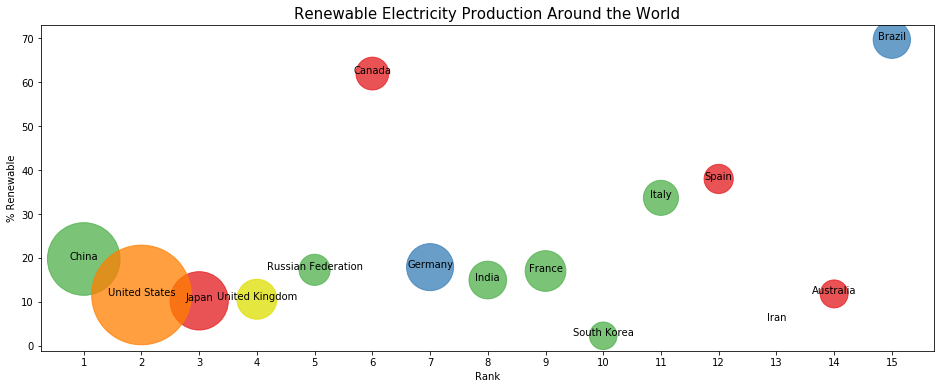

In [18]:
import matplotlib as plt
%matplotlib inline

ax = df.plot(x='Rank', y='% Renewable', kind='scatter', 
                c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                    '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                xticks=range(1,16), s=6*df['2015']/10**10, alpha=.75, figsize=[16,6]);

for i, txt in enumerate(df.index):
    ax.annotate(txt, [df['Rank'][i], df['% Renewable'][i]], ha='center')

plt.pyplot.title('Renewable Electricity Production Around the World', fontsize = 15)